# Preprocessing, Visualisation, Analysis

# Import dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from datetime import datetime
# from sklearn import preprocessing
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/ADA-Assessment-main/Preprocessing/train_data.csv')
df['Date'] = pd.to_datetime(df['Date'])
# df = df.set_index('Date').asfreq('D')
df.set_index('Date', inplace=True)
df

,BTC_Close,BTC_Open,BTC_High,BTC_Low,BTC_Volume,BTC_transactions,BTC_interesst,gold_Open,gold_Close,gold_High,...,oil_Open,oil_Close,oil_High,oil_Low,oil_Volume,VIX_Open,VIX_Close,VIX_High,VIX_Low,SP500_Close index
Date,,,,,,,,,,,,,,,,,,,,,
2014-12-01,376.132180,376.851000,381.582000,374.492000,0.06,79098,3,1160.0,1332.50,1220.4,...,66.000000,69.000000,69.540001,63.720001,504122,14.16,14.29,14.75,13.94,2053.44
2014-12-02,377.862000,376.132180,382.602000,376.082000,15.01,99419,3,1212.3,1314.70,1212.3,...,69.239998,66.879997,69.320000,66.669998,360300,14.10,12.85,14.17,12.85,2066.55
2014-12-03,382.452000,377.862000,383.719000,377.853110,0.55,99419,3,1198.1,1325.80,1213.7,...,67.599998,67.379997,68.230003,66.800003,293483,12.75,12.47,12.88,12.21,2074.33
2014-12-04,376.382000,382.452000,383.008000,373.913200,0.01,99419,3,1208.2,1324.20,1213.0,...,67.400002,66.809998,68.220001,66.089996,237011,12.70,12.38,13.23,12.09,2071.92
2014-12-05,368.361800,376.382000,378.106000,365.543000,0.00,90900,3,1203.1,1310.80,1206.0,...,66.800003,65.839996,66.889999,65.169998,276529,12.08,11.82,12.28,11.53,2075.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-08,9900.678867,9371.679970,9958.733998,9065.921045,25608.21,341986,19,1743.5,1713.90,1752.7,...,23.350000,24.740000,24.990000,23.260000,205181,30.14,27.98,30.39,27.89,2929.80
2020-05-11,8786.655182,9616.377064,9650.018603,8166.492188,36356.85,286789,19,1727.7,1698.00,1734.2,...,24.490000,24.139999,25.580000,23.670000,179591,28.46,27.57,31.46,26.97,2930.19
2020-05-12,8608.125245,8733.637943,9176.186390,8206.331505,19825.54,286789,19,1721.1,1706.80,1737.2,...,24.490000,25.780001,26.230000,24.219999,212335,28.47,33.04,33.04,26.00,2870.12


In [ ]:
df.columns

Index(['BTC_Close', 'BTC_Open', 'BTC_High', 'BTC_Low', 'BTC_Volume',
       'BTC_transactions', 'BTC_interesst', 'gold_Open', 'gold_Close',
       'gold_High', 'gold_Low', 'gold_Volume', 'gold_Chg%', 'oil_Open',
       'oil_Close', 'oil_High', 'oil_Low', 'oil_Volume', 'VIX_Open',
       'VIX_Close', 'VIX_High', 'VIX_Low', 'SP500_Close index'],
      dtype='object')

What can we predict with the dataset?
1. Predicting the closing price of Bitcoin, Gold, and Oil over the next day, week or month
2. Forecasting the volatility of the VIX index over the next few days or weeks? or month
3. Predicting the daily trading volume of Bitcoin, Gold, and Oil?

# Split train and test data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Split the data into train and test (7:3)
df_train, df_test = train_test_split(df, test_size=0.3, shuffle=False) #shuffle=False ensures data is split chronologically

# Univariate Prediction with LSTM Model

In [ ]:
#LSTM
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [ ]:
#Prepare data (Rolling widow)
def split_data(window_size, data):
    X = []
    y = []
    for i in range(window_size, data.shape[0]):
        X.append(data[i-window_size:i])
        y.append(data[i])
    X = np.array(X)
    y = np.array(y)
    return X, y

In [ ]:
#Version 1: Use only BTC_Close
scaler = MinMaxScaler()
train = scaler.fit_transform(df_train[['BTC_Close']])
test = scaler.transform(df_test[['BTC_Close']])
window_size=60 #50
X_train, y_train = split_data(window_size, train)
X_test, y_test = split_data(window_size, test)

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape= (window_size, 1)))
model.add(LSTM( 32, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))
# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train
history = model.fit(X_train, y_train, batch_size=32, epochs=30, validation_data=(X_test, y_test)) # batch_size=16, epochs=100

#Prediction
y_pred = model.predict(X_test)

y_pred =  pd.DataFrame(scaler.inverse_transform(y_pred), index=df_test[window_size:].index) 
y_actual=  pd.DataFrame(scaler.inverse_transform(y_test), index=df_test[window_size:].index)  #df_test['BTC_Close'][window_size:]
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((y_pred - y_actual) ** 2)))
print(rmse)

Epoch 1/30
28/28 [==============================] - 8s 122ms/step - loss: 0.0084 - val_loss: 0.0045
Epoch 2/30
28/28 [==============================] - 2s 78ms/step - loss: 0.0021 - val_loss: 0.0021
Epoch 3/30
28/28 [==============================] - 3s 121ms/step - loss: 0.0017 - val_loss: 0.0023
Epoch 4/30
28/28 [==============================] - 2s 86ms/step - loss: 0.0015 - val_loss: 0.0020
Epoch 5/30
28/28 [==============================] - 3s 124ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 6/30
28/28 [==============================] - 5s 165ms/step - loss: 0.0011 - val_loss: 0.0018
Epoch 7/30
28/28 [==============================] - 5s 190ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 8/30
28/28 [==============================] - 4s 129ms/step - loss: 9.9170e-04 - val_loss: 0.0012
Epoch 9/30
28/28 [==============================] - 4s 142ms/step - loss: 9.2779e-04 - val_loss: 0.0011
Epoch 10/30
28/28 [==============================] - 3s 105ms/step - loss: 8.3647e-04 - val_lo

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


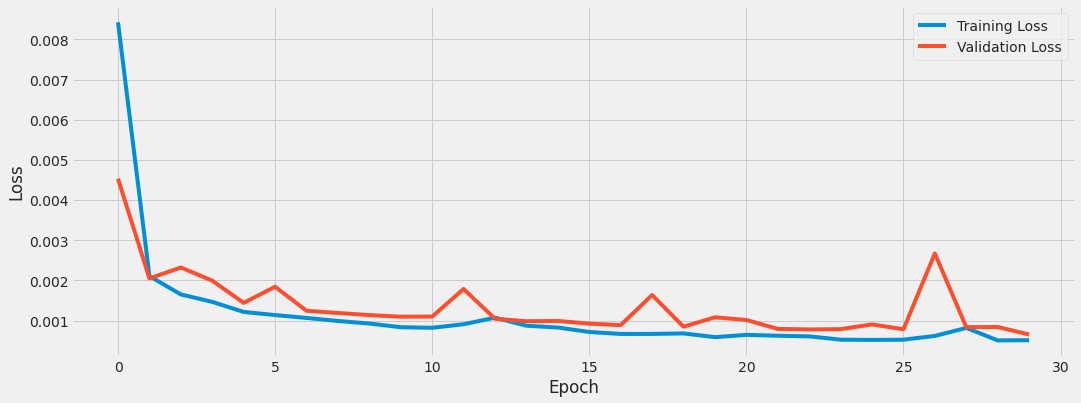

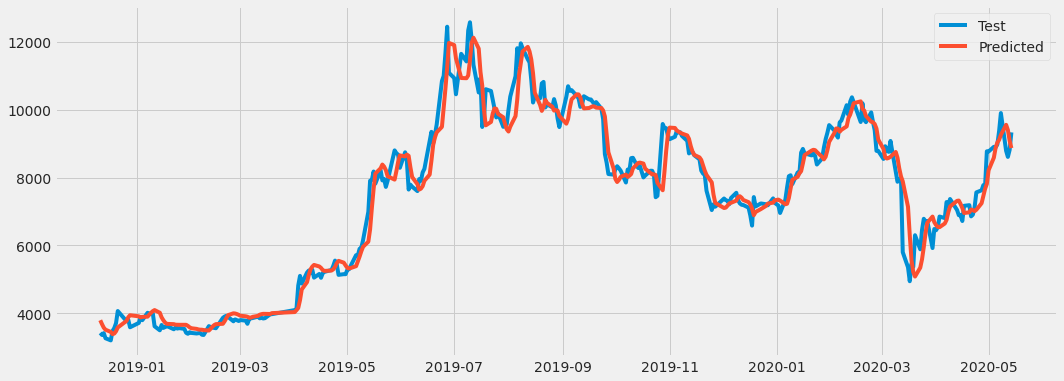

In [ ]:
# Plot the training and validation loss over time (To see if there is overfitting)
plt.figure(figsize=(16,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#show prediction and test for comparison
plt.figure(figsize=(16,6))
# plt.plot(df_train['BTC_Close'], label='Train')
plt.plot(y_actual, label='Test')
plt.plot(y_pred, label='Predicted')

plt.legend()
plt.show()

# Repeat using ARIMA

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 47.6 MB/s eta 0:00:00


In [ ]:
#ARIMA
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts
from pmdarima.arima import auto_arima

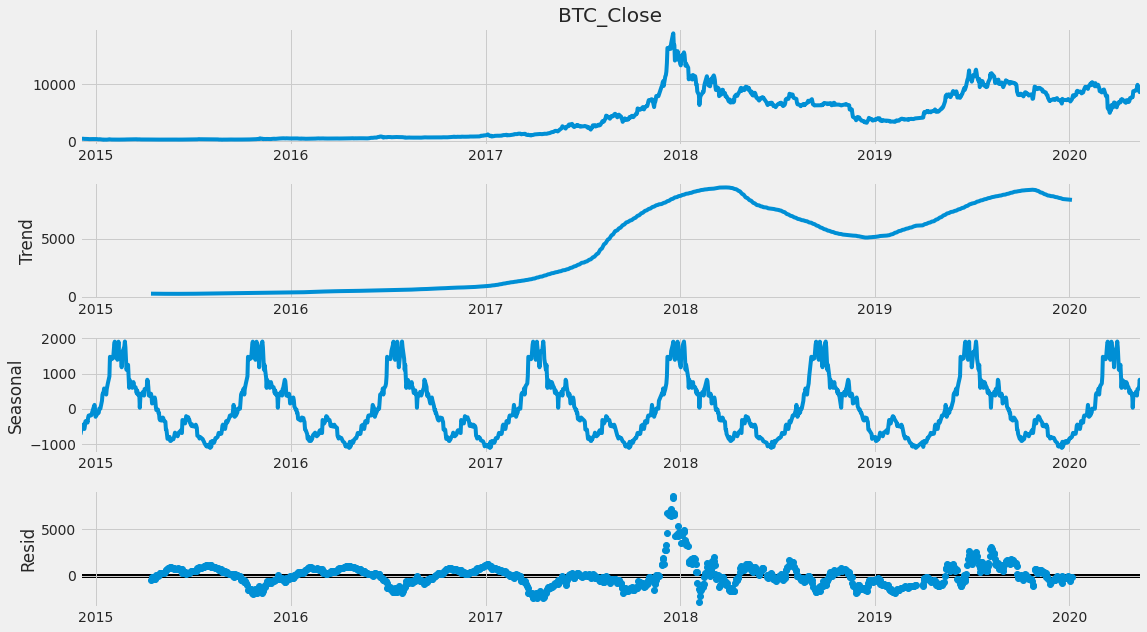

In [ ]:
result = sm.tsa.seasonal_decompose(df['BTC_Close'], model='additive', period=180) #'additive'
fig = result.plot()
fig.set_size_inches((16, 9))
# Tight layout to realign things
fig.tight_layout()
plt.show()

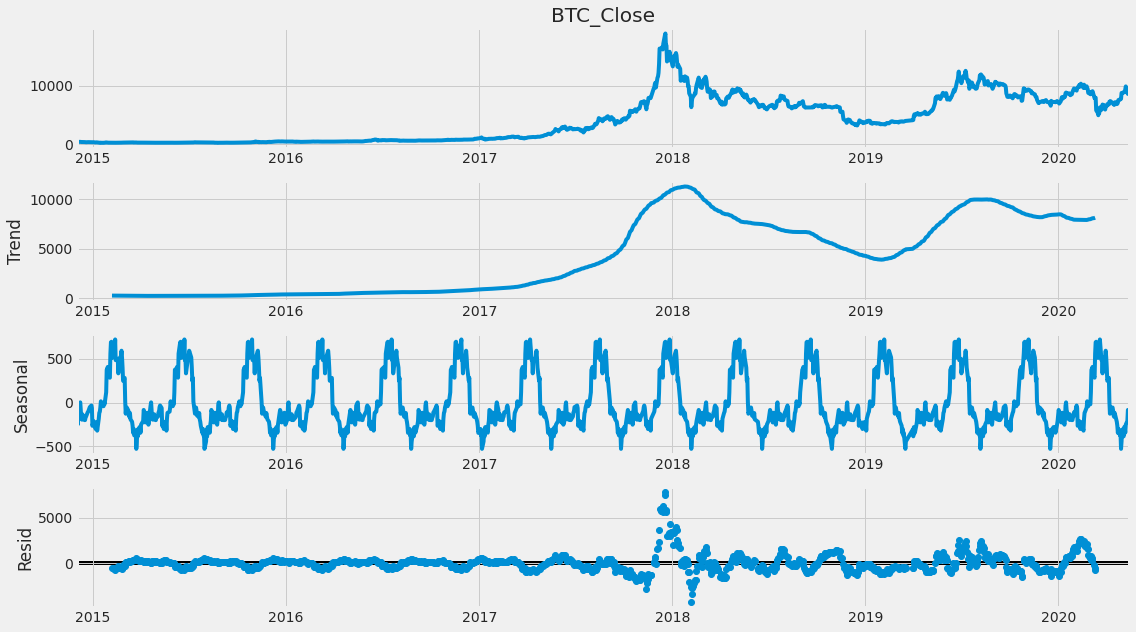

In [ ]:
result = sm.tsa.seasonal_decompose(df['BTC_Close'], model='additive', period=90) #'additive'
fig = result.plot()
fig.set_size_inches((16, 9))
# Tight layout to realign things
fig.tight_layout()
plt.show()

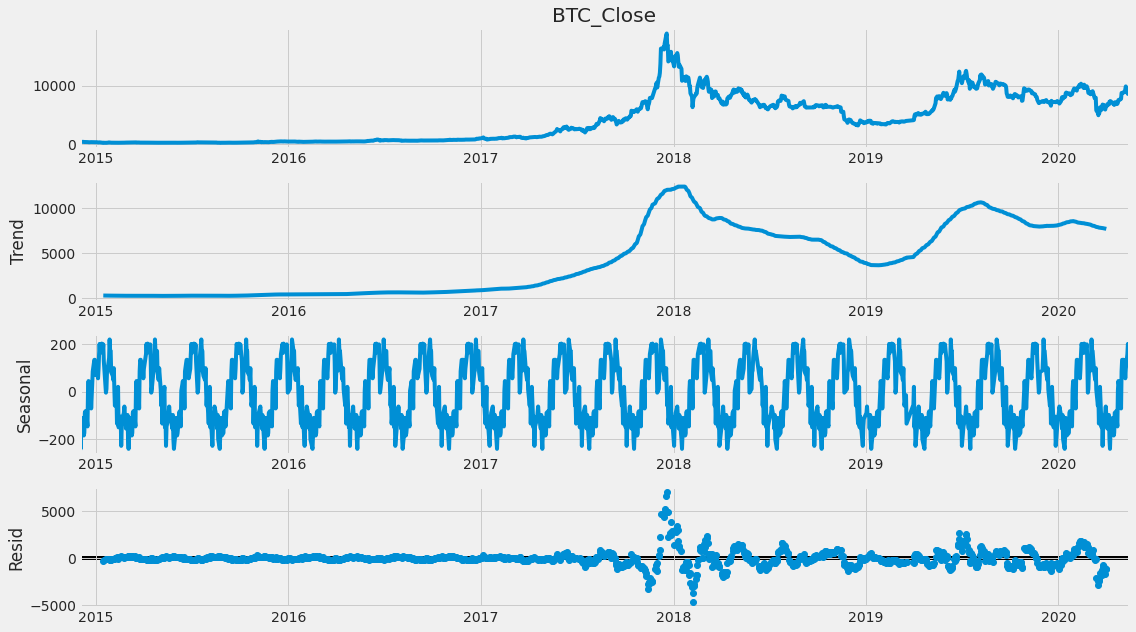

In [ ]:
result = sm.tsa.seasonal_decompose(df['BTC_Close'], model='additive', period=60) #'additive'
fig = result.plot()
fig.set_size_inches((16, 9))
# Tight layout to realign things
fig.tight_layout()
plt.show()

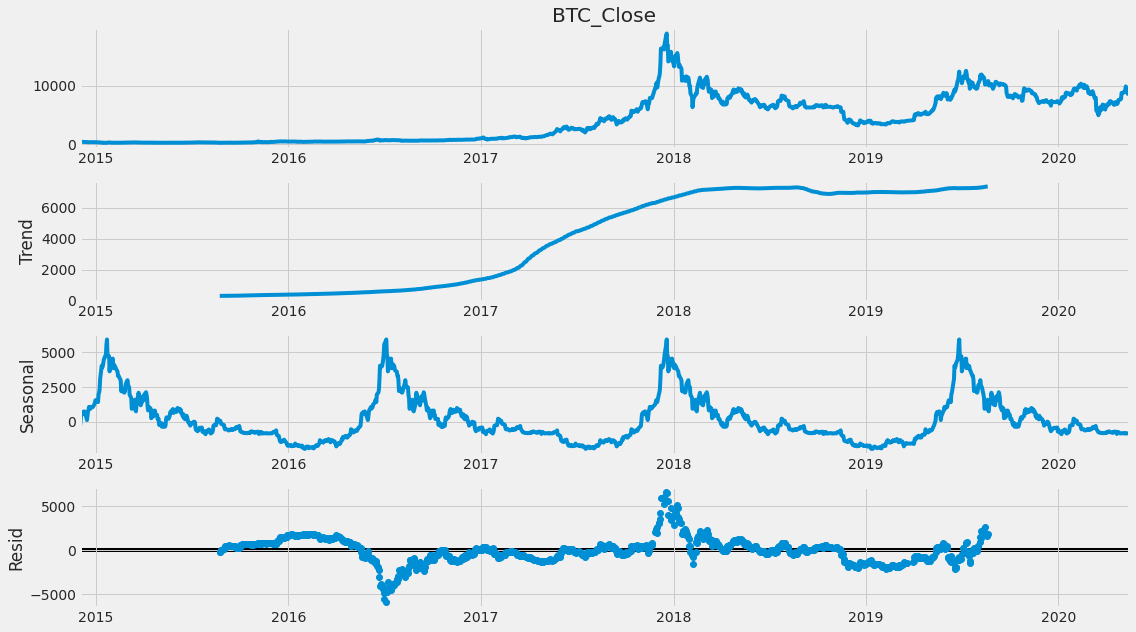

In [ ]:
result = sm.tsa.seasonal_decompose(df['BTC_Close'], model='additive', period=365) #'additive'
fig = result.plot()
fig.set_size_inches((16, 9))
# Tight layout to realign things
fig.tight_layout()
plt.show()

In [ ]:
#from above graphs, there is some sort of seasonality at period= 60,90,180,365, we can take 60 as the period input
from pmdarima.arima import ADFTest
#Augmented Dicky Fuller Test
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(df['BTC_Close'])
#result show that the dataset is not stationary, a common method to solve this is by differencing

(0.1570035760507248, True)

In [ ]:
# # # Plot the time series
# # plt.plot(df['BTC_Close'])
# # plt.title('Bitcoin Price')
# # plt.xlabel('Date')
# # plt.ylabel('BTC_Closing')
# # plt.show()

# # # Perform ADF test to check for stationarity
# # result = ts.adfuller(df['BTC_Close'])
# # print('ADF Statistic: %f' % result[0])
# # print('p-value: %f' % result[1])
# # print('Critical Values:')
# # for key, value in result[4].items():
# #     print('\t%s: %.3f' % (key, value))

# # # The p-value is above 0.05, indicating that the series is non-stationary and needs to be transformed.

# # #P-value is 0.580013

# # # Transform the series by differencing
# # diff_series = df['BTC_Close'].diff().dropna()

# # # Perform ADF test again to check for stationarity
# # result = ts.adfuller(diff_series)
# # print('ADF Statistic: %f' % result[0])
# # print('p-value: %f' % result[1])
# # print('Critical Values:')
# # for key, value in result[4].items():
# #     print('\t%s: %.3f' % (key, value))

# # # The p-value is now below 0.05, indicating that the series is stationary.

# # Determine hyperparameters using auto-arima
# model = auto_arima(df_train['BTC_Close'], start_p=0, d=1, start_q=0, max_p=5, max_d=5, max_q=5,  
#                    start_P=0, D=1, start_Q=0, max_P=5, max_D=5, max_Q=5,
#                    seasonal=True, m=60, trace=True, error_action='ignore', suppress_warnings=True, stepwise=False)
# print(model.summary())

In [ ]:
# method to be used later
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i-interval]
        diff.append(value)
    return np.array(diff)

def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

In [ ]:
history = [x for x in df_train['BTC_Close']]
predictions = []

#Rolling 
for i in range(len(df_test)):
    model = ARIMA(history, order=(3,1,3))
    model = model.fit()
    y_pred1 = (model.forecast())[0]
    predictions.append(y_pred1)
    obs = df_test['BTC_Close'][i]
    history.append(obs)

# rmse = np.sqrt(np.mean(((y_pred - y_actual) ** 2)))
# rolling_mse = mean_squared_error(test, predictions)

# fig = go.Figure()
# fig.add_trace(go.Scatter(x=df_test.index,y=df_test.BTC_Close,name='Close'))
# fig.add_trace(go.Scatter(x=df_test.index,y=predictions,name='Forecast_Rolling_ARIMA'))
# fig.show()

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimiz

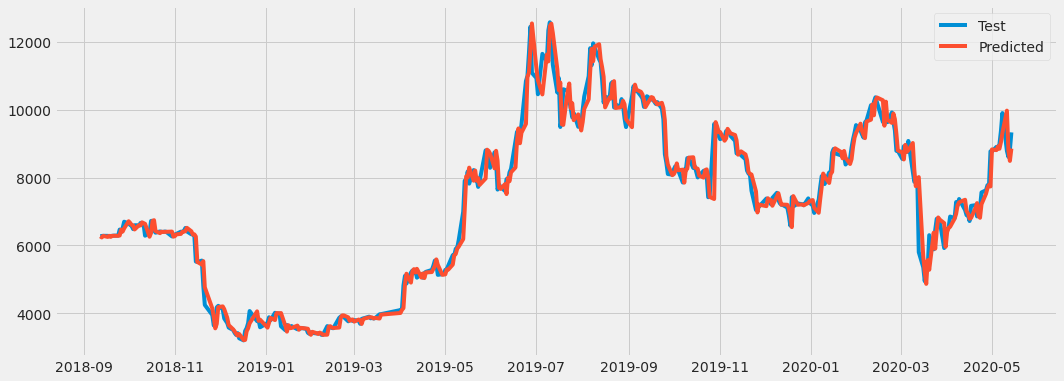

In [ ]:
y_pred1 =  pd.DataFrame(predictions, index=df_test.index) 
#show prediction and test for comparison
plt.figure(figsize=(16,6))
# plt.plot(df_train['BTC_Close'], label='Train')
plt.plot(df_test['BTC_Close'], label='Test')
plt.plot(y_pred1, label='Predicted')

plt.legend()
plt.show()

In [ ]:
rmse = np.sqrt(np.mean(((y_pred1[0] - df_test['BTC_Close']) ** 2)))
rmse

363.14318476249

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_test.index,y=df_test.BTC_Close,name='Close'))
fig.add_trace(go.Scatter(x=df_test.index,y=predictions,name='Forecast_Rolling_ARIMA'))
fig.show()

In [ ]:
# # Predictions

# n_periods=len(df_test)
# # y_pred = pd.DataFrame(model.predict(n_periods = n_periods), index=df_test.index)
# y_pred = pd.DataFrame(model.predict(n_periods = n_periods))

# plt.figure(figsize=(16,6)) 
# # plt.plot (df_train['BTC_Close'], label="Train") 
# # plt.plot (df_test['BTC_Close'], label="Test")
# plt.plot (df_test['BTC_Close'], label="Test")
# plt.plot (y_pred, label="Predicted")
# plt.legend()
# # plt. legend(loc = 'Left corner')
# plt.show ()

# # # Get the root mean squared error (RMSE)
# # rmse = np.sqrt(np.mean(((y_pred - df_test['BTC_Close']) ** 2)))
# # rmse
# len(y_pred)
# len(df_test['BTC_Close'])

# Multivariate Prediction

## PCA + LTSM

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

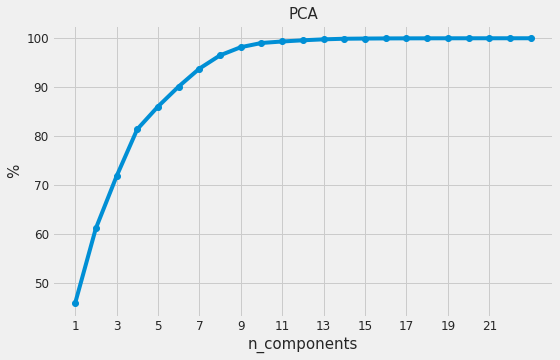

In [ ]:
#perform PCA for dimensionality reduction
scaler = StandardScaler().fit(df_train)
X_scaled = scaler.transform(df_train)
X_scaled= pd.DataFrame(X_scaled)
estimator_pca = PCA(n_components=None)
estimator_pca.fit(X_scaled)
evr = estimator_pca.explained_variance_ratio_ 
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(evr) + 1), np.cumsum(evr*100), "-o")
plt.title("PCA", fontsize=15)
plt.xlabel("n_components",fontsize=15)
plt.ylabel("%",fontsize=15)
plt.xticks(range(1,len(evr),2),fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#should pick n=7 or 8?

In [ ]:
#Prepare data (Rolling widow)
def split_data_m(window_size, data):
    X = []
    y = []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i,0:])
        y.append(data[i,0])
    X = np.array(X)
    y = np.array(y)
    return X, y

In [ ]:
# Apply PCA
pca_scaler = StandardScaler().fit(df_train)
X_train_pca = pca_scaler.transform(df_train)
X_test_pca = pca_scaler.transform(df_test)
#select n_component to have explained_variance between 95–99%
pca = PCA(n_components=0.95) #n_components=8
X_train_pca = pca.fit_transform(X_train_pca)
X_test_pca = pca.transform(X_test_pca)

# Scale the data
X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
X_train_scaled = X_scaler.fit_transform(X_train_pca)
X_test_scaled = X_scaler.transform(X_test_pca)
y_train_scaled = y_scaler.fit_transform(df_train[['BTC_Close']])
y_test_scaled = y_scaler.transform(df_test[['BTC_Close']])

final_train_data = pd.concat([pd.DataFrame(y_train_scaled),pd.DataFrame(X_train_scaled)],axis=1).values
final_test_data = pd.concat([pd.DataFrame(y_test_scaled),pd.DataFrame(X_test_scaled)],axis=1).values

window_size=90
X_train_lstm, y_train_lstm = split_data_m(window_size, final_train_data)
X_test_lstm, y_test_lstm = split_data_m(window_size, final_test_data)

# print(f'X_train Shape: {X_train_lstm.shape}, y_train {y_train_lstm.shape}')

# # check the array size
# print(f'X_test Shape: {X_test_lstm.shape}, y_test {y_test_lstm.shape}')

# # reshaping array
# X_train_lstm = np.reshape(X_train_lstm, (X_train_lstm.shape[0], X_train_lstm.shape[1], X_train_lstm.shape[2]))
y_train_lstm = y_train_lstm[:, np.newaxis] 
# # check the array size
# print(f'X_train Shape: {X_train_lstm.shape}, y_train {y_train_lstm.shape}')
# # reshaping array
# X_test_lstm = np.reshape(X_test_lstm, (X_test_lstm.shape[0], X_test_lstm.shape[1], X_train_lstm.shape[2]))
y_test_lstm = y_test_lstm[:, np.newaxis]
# # check the array size
# print(f'X_test Shape: {X_test_lstm.shape}, y_test {y_test_lstm.shape}')

model_lstm = Sequential()
model_lstm.add(LSTM(units=64, return_sequences=True, input_shape=(window_size, X_train_lstm.shape[2])))
model_lstm.add(LSTM(units=32, return_sequences=False))
# model_lstm.add(LSTM(units=32, return_sequences=False))
# model_lstm.add(LSTM(units=50))
model_lstm.add(Dense(25))
model_lstm.add(Dense(units=1))

model_lstm.compile(optimizer='adam', loss='mean_squared_error')

#Train
history = model_lstm.fit(X_train_lstm, y_train_lstm, batch_size=32, epochs=30, validation_data=(X_test_lstm, y_test_lstm)) # batch_size=16, epochs=100

# Get the predicted price
y_pred2 = model_lstm.predict(X_test_lstm)

y_pred2 = pd.DataFrame(y_scaler.inverse_transform(y_pred2), index=df_test[window_size:].index) 
y_test2 = pd.DataFrame(y_scaler.inverse_transform(y_test_lstm), index=df_test[window_size:].index) 

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((y_pred2 - y_test2) ** 2)))
print(rmse)


Epoch 1/30
27/27 [==============================] - 17s 240ms/step - loss: 0.0305 - val_loss: 0.0169
Epoch 2/30
27/27 [==============================] - 3s 115ms/step - loss: 0.0039 - val_loss: 0.0040
Epoch 3/30
27/27 [==============================] - 3s 114ms/step - loss: 0.0029 - val_loss: 0.0045
Epoch 4/30
27/27 [==============================] - 7s 273ms/step - loss: 0.0022 - val_loss: 0.0023
Epoch 5/30
27/27 [==============================] - 3s 125ms/step - loss: 0.0016 - val_loss: 0.0027
Epoch 6/30
27/27 [==============================] - 3s 115ms/step - loss: 0.0013 - val_loss: 0.0025
Epoch 7/30
27/27 [==============================] - 3s 116ms/step - loss: 0.0012 - val_loss: 0.0025
Epoch 8/30
27/27 [==============================] - 5s 178ms/step - loss: 0.0010 - val_loss: 0.0027
Epoch 9/30
27/27 [==============================] - 3s 126ms/step - loss: 9.2295e-04 - val_loss: 0.0027
Epoch 10/30
27/27 [==============================] - 3s 113ms/step - loss: 9.2441e-04 - val_los

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [ ]:
n_pcs= pca.n_components_ # get number of component
# get the index of the most important feature on each component
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = df.columns
# get the most important feature names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
most_important_names

['SP500_Close index',
 'VIX_High',
 'oil_High',
 'gold_Close',
 'gold_Volume',
 'gold_Chg%',
 'oil_Volume',
 'BTC_Volume']

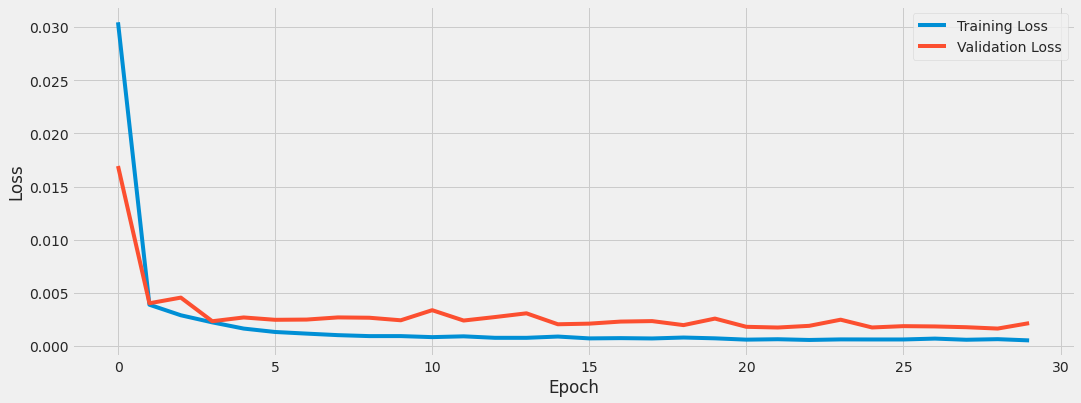

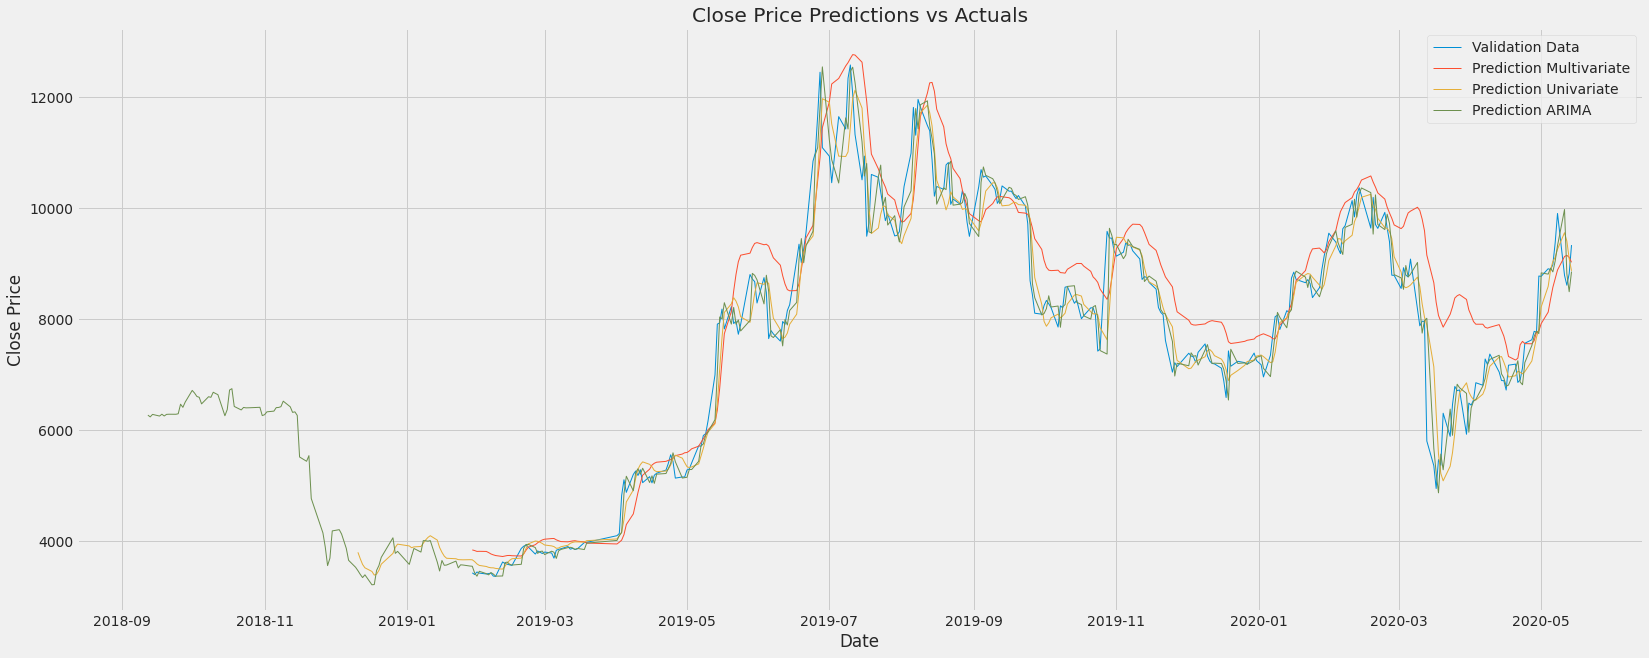

In [ ]:
# Plot the training and validation loss over time (To see if there is overfitting)
plt.figure(figsize=(16,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


plt.figure(figsize=(25,10))
# Plot the actual close values for the validation and training data
plt.plot(y_test2, label='Validation Data', linewidth=1)
plt.plot(y_pred2, label='Prediction Multivariate', linewidth=1)
plt.plot(y_pred, label='Prediction Univariate', linewidth=1)
plt.plot(y_pred1, label='Prediction ARIMA', linewidth=1)

# Add a legend and axis labels
plt.legend()
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price Predictions vs Actuals')
plt.show()

As seen from plotting the prediction values against the actual values, the multivariate prediction is not performing too well towards the end.

RMSE: 
Multi - 870.010239, Uni - 542.702668, ARIMA - 363.14318476249

## Feature Generation (incomplete) 
Some of the ways we do to improve the performance is to create other features from the existing dataset. Some commonly used features in time series data are: moving averages, momentum indicators indicators such as RSI, MACD.

In [ ]:
# Create featues indicating weekends, dayofweek and month
df['weekend']= (df.index.dayofweek >= 5).astype(int)
df['dayofweek']= df.index.dayofweek
df['month'] = df.index.month

In [ ]:
#MACD - Moving Average Convergence/Divergence

#The MACD line is calculated by subtracting the 26-period EMA from the 12-period EMA. 
#The result of that calculation is the MACD line. 
#A nine-day EMA of the MACD line is called the signal line, which is then plotted on top of the MACD line, which can function as a trigger for buy or sell signals.

# calculate the 12-day and 26-day EMA
ema12 = df['BTC_Close'].ewm(span=12, adjust=False).mean()
ema26 = df['BTC_Close'].ewm(span=26, adjust=False).mean()
# calculate the MACD line as the difference between the 12-day and 26-day EMA
macd = ema12 - ema26
# calculate the 9-day EMA of the MACD line
signal = macd.ewm(span=9, adjust=False).mean()
# calculate the MACD histogram as the difference between the MACD line and the signal line
histogram = macd - signal

# add the MACD line, signal line, and histogram to the DataFrame
df['BTC_MACD'] = macd
# df['Signal Line'] = signal
# df['MACD Histogram'] = histogram

# calculate the 12-day and 26-day EMA
ema12 = df['gold_Close'].ewm(span=12, adjust=False).mean()
ema26 = df['gold_Close'].ewm(span=26, adjust=False).mean()
# calculate the MACD line as the difference between the 12-day and 26-day EMA
macd = ema12 - ema26
# calculate the 9-day EMA of the MACD line
signal = macd.ewm(span=9, adjust=False).mean()
# calculate the MACD histogram as the difference between the MACD line and the signal line
histogram = macd - signal

# add the MACD line, signal line, and histogram to the DataFrame
df['gold_MACD'] = macd
# df['Signal Line'] = signal
# df['MACD Histogram'] = histogram

# calculate the 12-day and 26-day EMA
ema12 = df['oil_Close'].ewm(span=12, adjust=False).mean()
ema26 = df['oil_Close'].ewm(span=26, adjust=False).mean()
# calculate the MACD line as the difference between the 12-day and 26-day EMA
macd = ema12 - ema26
# calculate the 9-day EMA of the MACD line
signal = macd.ewm(span=9, adjust=False).mean()
# calculate the MACD histogram as the difference between the MACD line and the signal line
histogram = macd - signal

# add the MACD line, signal line, and histogram to the DataFrame
df['oil_MACD'] = macd
# df['Signal Line'] = signal
# df['MACD Histogram'] = histogram

# calculate the 12-day and 26-day EMA
ema12 = df['VIX_Close'].ewm(span=12, adjust=False).mean()
ema26 = df['VIX_Close'].ewm(span=26, adjust=False).mean()
# calculate the MACD line as the difference between the 12-day and 26-day EMA
macd = ema12 - ema26
# calculate the 9-day EMA of the MACD line
signal = macd.ewm(span=9, adjust=False).mean()
# calculate the MACD histogram as the difference between the MACD line and the signal line
histogram = macd - signal

# add the MACD line, signal line, and histogram to the DataFrame
df['VIX_MACD'] = macd
# df['Signal Line'] = signal
# df['MACD Histogram'] = histogram

In [ ]:
#RSI
n=14
# calculate the difference between each closing price and the previous closing price
delta = df['BTC_Close'].diff()
# calculate the gains and losses separately
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
# calculate the average gain and loss over the past n periods
avg_gain = gain.rolling(window=n).mean()
avg_loss = loss.rolling(window=n).mean()
# calculate the relative strength (RS)
rs = avg_gain / avg_loss
# calculate the RSI
df['BTC_RSI'] = 100 - (100 / (1 + rs))

n=14
# calculate the difference between each closing price and the previous closing price
delta = df['gold_Close'].diff()
# calculate the gains and losses separately
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
# calculate the average gain and loss over the past n periods
avg_gain = gain.rolling(window=n).mean()
avg_loss = loss.rolling(window=n).mean()
# calculate the relative strength (RS)
rs = avg_gain / avg_loss
# calculate the RSI
df['gold_RSI'] = 100 - (100 / (1 + rs))

n=14
# calculate the difference between each closing price and the previous closing price
delta = df['oil_Close'].diff()
# calculate the gains and losses separately
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
# calculate the average gain and loss over the past n periods
avg_gain = gain.rolling(window=n).mean()
avg_loss = loss.rolling(window=n).mean()
# calculate the relative strength (RS)
rs = avg_gain / avg_loss
# calculate the RSI
df['oil_RSI'] = 100 - (100 / (1 + rs))

n=14
# calculate the difference between each closing price and the previous closing price
delta = df['VIX_Close'].diff()
# calculate the gains and losses separately
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
# calculate the average gain and loss over the past n periods
avg_gain = gain.rolling(window=n).mean()
avg_loss = loss.rolling(window=n).mean()
# calculate the relative strength (RS)
rs = avg_gain / avg_loss
# calculate the RSI
df['VIX_RSI'] = 100 - (100 / (1 + rs))

In [ ]:
# #volatility measures?
# df['gold_vol']= df['gold_Close'].pct_change().rolling(window=30).std() * (252**0.5)

In [ ]:
# #Come up with other features that can be useful for prediction
# # df['lag1'] = df['close'].shift(1)
# # df['lag2'] = df['close'].shift(2)
# # df['lag3'] = df['close'].shift(3)# Compute a 7-day moving average of the closing price

# #moving average
# df['BTC_a7'] = df['BTC_Close'].rolling(window=7).mean()
# df['gold_a7'] = df['gold_Close'].rolling(window=7).mean()
# df['oil_a7'] = df['oil_Close'].rolling(window=7).mean()
# df['vix_a7'] = df['VIX_Close'].rolling(window=7).mean()
# df['SP500_a7'] = df['SP500_Close index'].rolling(window=7).mean()

In [ ]:
df = df.dropna()

can use for some visualisation?

## Correlations between variables

<Axes: >

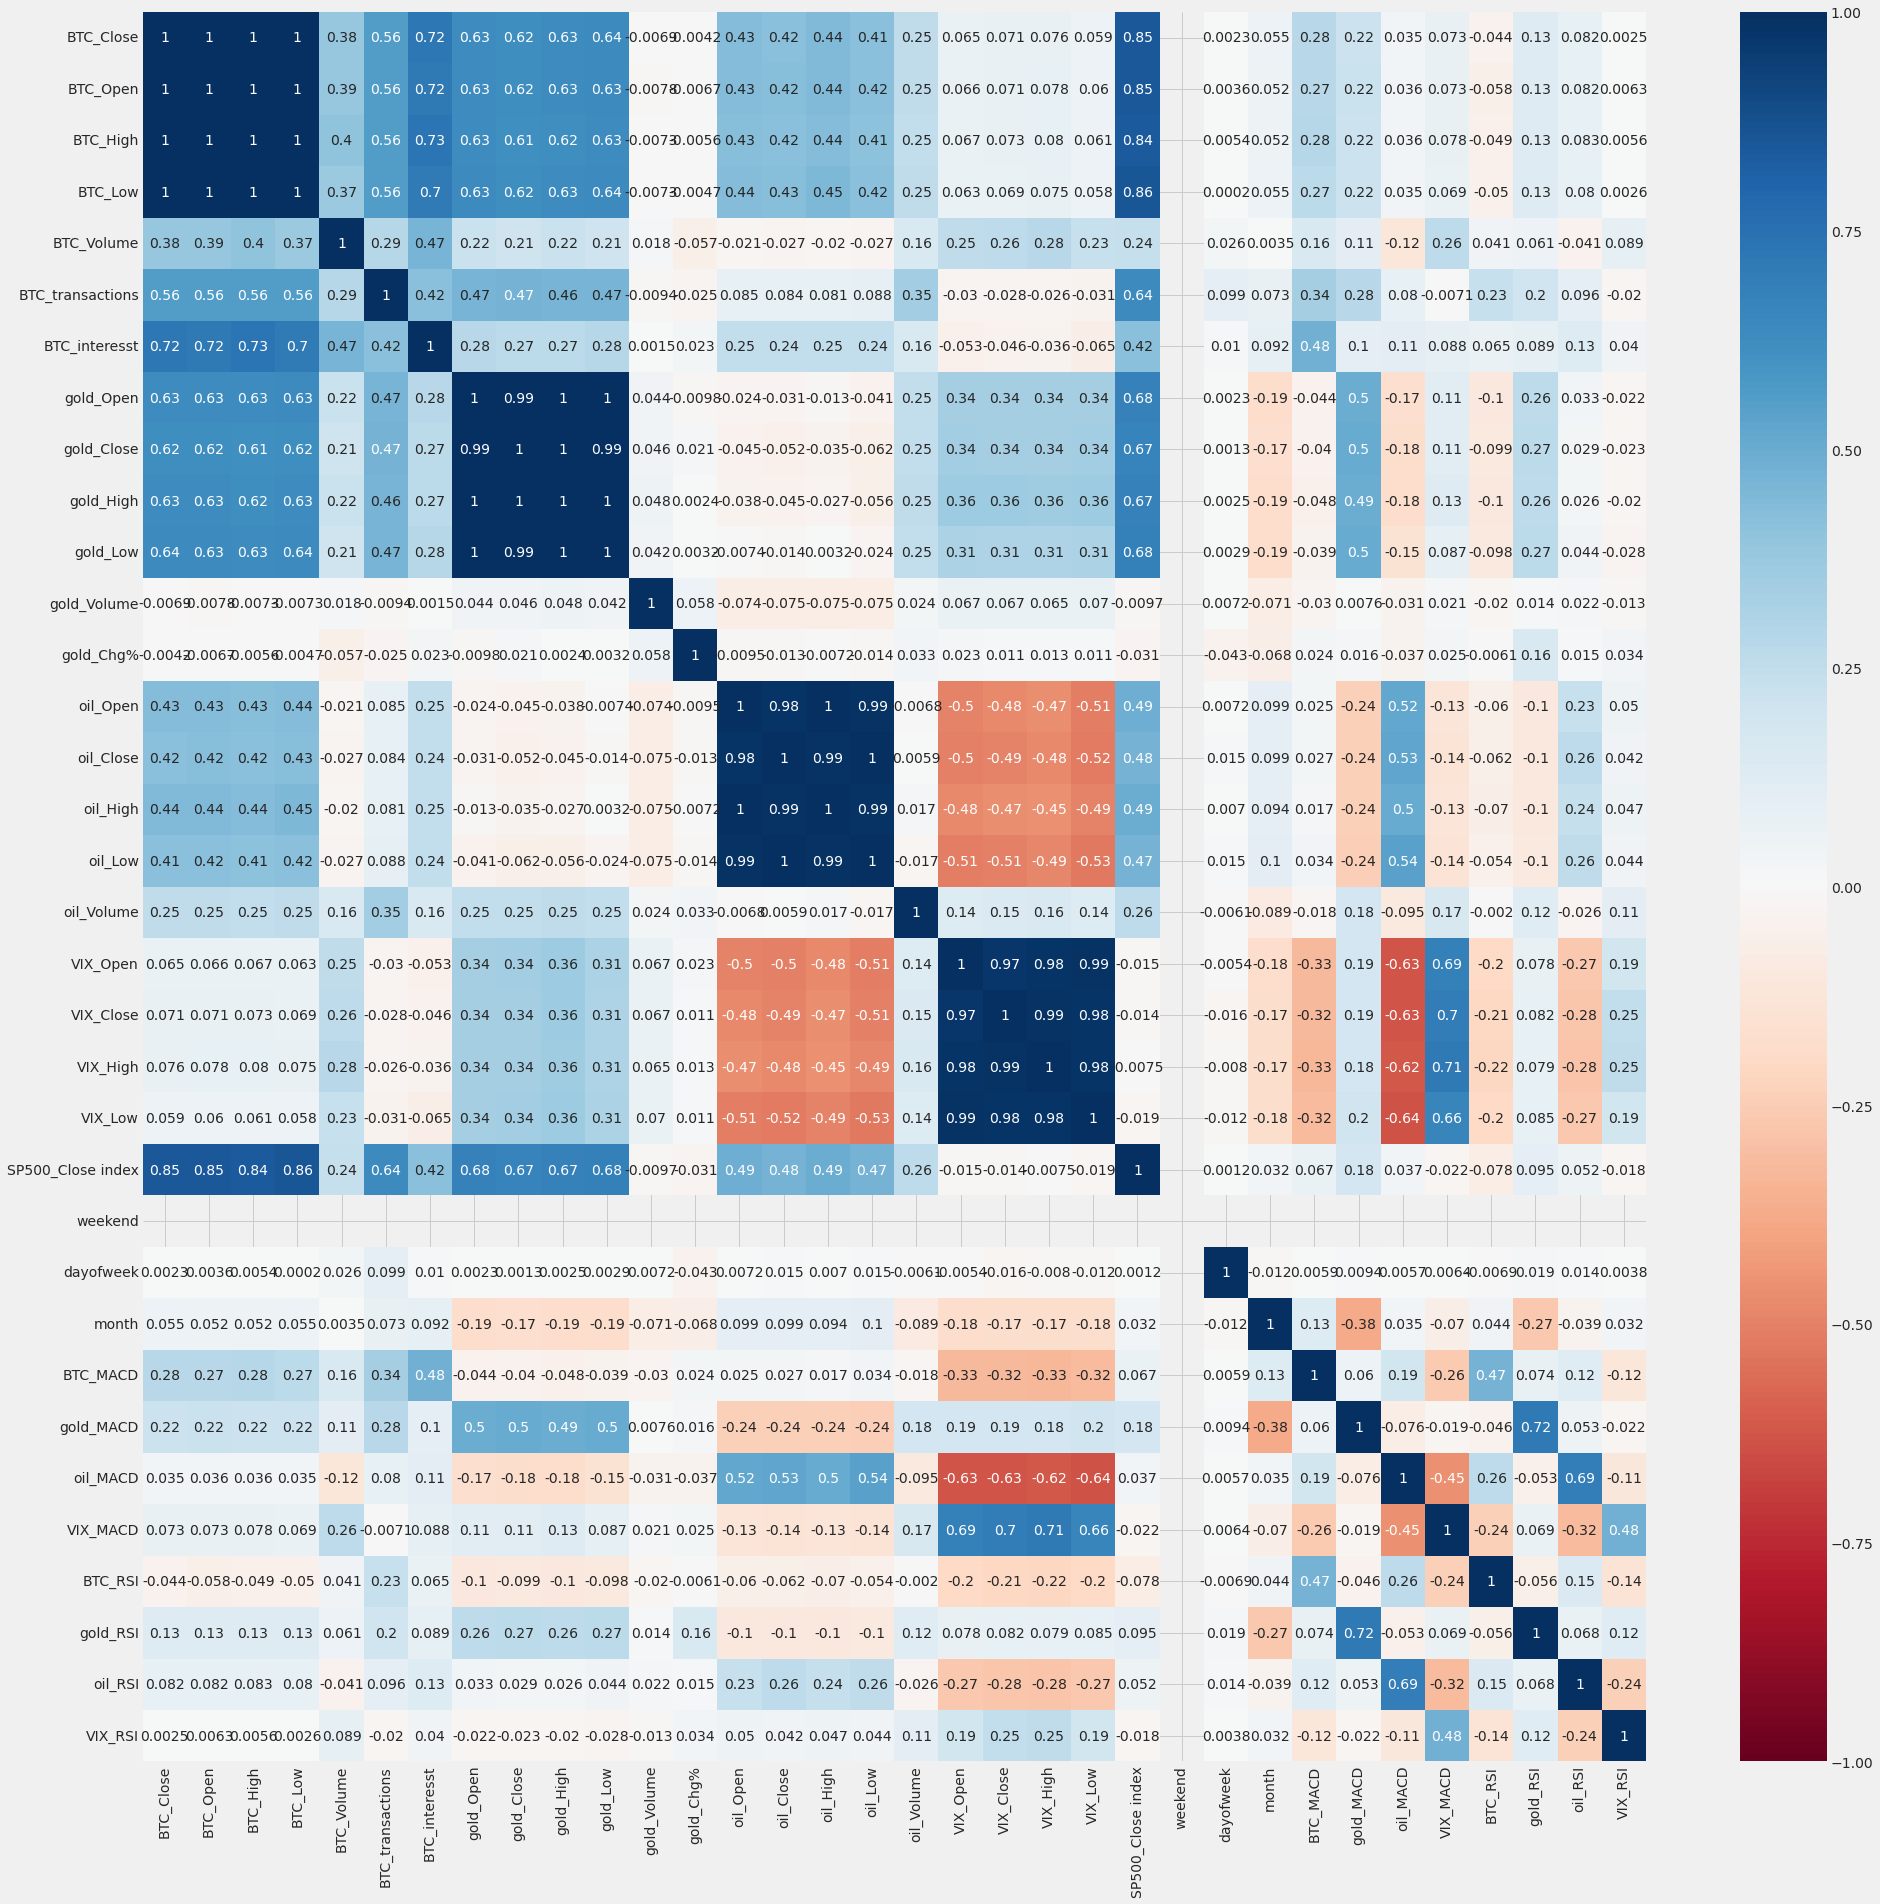

In [ ]:
plt.figure(figsize = (30,30))
sns.heatmap(df.corr(), annot=True, cmap="RdBu", vmin=-1, vmax=1)

From the heatmap, we can see that 'Gold Change', 'Gold Volume' have very low correlation to any other variables

In [ ]:
# df= df.drop(['gold_Volume', 'gold_Chg%'], axis=1)

# Feature Selection?

## Try PCA vs picking feature by ourselves

In [ ]:
df_train, df_test = train_test_split(df, test_size=0.3, shuffle=False) #shuffle=False ensures data is split chronologically

In [ ]:
# Apply PCA
pca_scaler = StandardScaler().fit(df_train)
X_train_pca = pca_scaler.transform(df_train)
X_test_pca = pca_scaler.transform(df_test)
#select n_component to have explained_variance between 95–99%
pca = PCA(n_components=0.95) #n_components=8
X_train_pca = pca.fit_transform(X_train_pca)
X_test_pca = pca.transform(X_test_pca)

# Scale the data
X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
X_train_scaled = X_scaler.fit_transform(X_train_pca)
X_test_scaled = X_scaler.transform(X_test_pca)
y_train_scaled = y_scaler.fit_transform(df_train[['BTC_Close']])
y_test_scaled = y_scaler.transform(df_test[['BTC_Close']])

final_train_data = pd.concat([pd.DataFrame(y_train_scaled),pd.DataFrame(X_train_scaled)],axis=1).values
final_test_data = pd.concat([pd.DataFrame(y_test_scaled),pd.DataFrame(X_test_scaled)],axis=1).values

window_size=90
X_train_lstm, y_train_lstm = split_data_m(window_size, final_train_data)
X_test_lstm, y_test_lstm = split_data_m(window_size, final_test_data)

# print(f'X_train Shape: {X_train_lstm.shape}, y_train {y_train_lstm.shape}')

# # check the array size
# print(f'X_test Shape: {X_test_lstm.shape}, y_test {y_test_lstm.shape}')

# # reshaping array
# X_train_lstm = np.reshape(X_train_lstm, (X_train_lstm.shape[0], X_train_lstm.shape[1], X_train_lstm.shape[2]))
y_train_lstm = y_train_lstm[:, np.newaxis] 
# # check the array size
# print(f'X_train Shape: {X_train_lstm.shape}, y_train {y_train_lstm.shape}')
# # reshaping array
# X_test_lstm = np.reshape(X_test_lstm, (X_test_lstm.shape[0], X_test_lstm.shape[1], X_train_lstm.shape[2]))
y_test_lstm = y_test_lstm[:, np.newaxis]
# # check the array size
# print(f'X_test Shape: {X_test_lstm.shape}, y_test {y_test_lstm.shape}')

model_lstm2 = Sequential()
model_lstm2.add(LSTM(units=64, return_sequences=True, input_shape=(window_size, X_train_lstm.shape[2])))
model_lstm2.add(LSTM(units=32, return_sequences=False))
# model_lstm.add(LSTM(units=32, return_sequences=False))
# model_lstm.add(LSTM(units=50))
model_lstm2.add(Dense(25))
model_lstm2.add(Dense(units=1))

model_lstm2.compile(optimizer='adam', loss='mean_squared_error')

#Train
history = model_lstm2.fit(X_train_lstm, y_train_lstm, batch_size=32, epochs=30, validation_data=(X_test_lstm, y_test_lstm)) # batch_size=16, epochs=100

# Get the predicted price
y_pred3 = model_lstm2.predict(X_test_lstm)

y_pred3 = pd.DataFrame(y_scaler.inverse_transform(y_pred3), index=df_test[window_size:].index) 
y_test3 = pd.DataFrame(y_scaler.inverse_transform(y_test_lstm), index=df_test[window_size:].index) 

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((y_pred3 - y_test3) ** 2)))
print(rmse)


Epoch 1/30
27/27 [==============================] - 13s 220ms/step - loss: 0.0164 - val_loss: 0.0050
Epoch 2/30
27/27 [==============================] - 3s 115ms/step - loss: 0.0022 - val_loss: 0.0043
Epoch 3/30
27/27 [==============================] - 3s 116ms/step - loss: 0.0018 - val_loss: 0.0030
Epoch 4/30
27/27 [==============================] - 4s 151ms/step - loss: 0.0013 - val_loss: 0.0079
Epoch 5/30
27/27 [==============================] - 4s 147ms/step - loss: 0.0014 - val_loss: 0.0056
Epoch 6/30
27/27 [==============================] - 3s 110ms/step - loss: 0.0012 - val_loss: 0.0046
Epoch 7/30
27/27 [==============================] - 3s 110ms/step - loss: 0.0011 - val_loss: 0.0061
Epoch 8/30
27/27 [==============================] - 4s 139ms/step - loss: 0.0012 - val_loss: 0.0042
Epoch 9/30
27/27 [==============================] - 4s 159ms/step - loss: 8.6589e-04 - val_loss: 0.0037
Epoch 10/30
27/27 [==============================] - 5s 201ms/step - loss: 9.7743e-04 - val_los

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [ ]:
n_pcs= pca.n_components_ # get number of component
# get the index of the most important feature on each component
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = df.columns
# get the most important feature names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
most_important_names

['SP500_Close index',
 'VIX_High',
 'gold_MACD',
 'BTC_MACD',
 'oil_RSI',
 'oil_Volume',
 'gold_Chg%',
 'gold_Volume',
 'dayofweek',
 'gold_Chg%',
 'gold_Volume',
 'BTC_RSI',
 'BTC_Volume',
 'month']

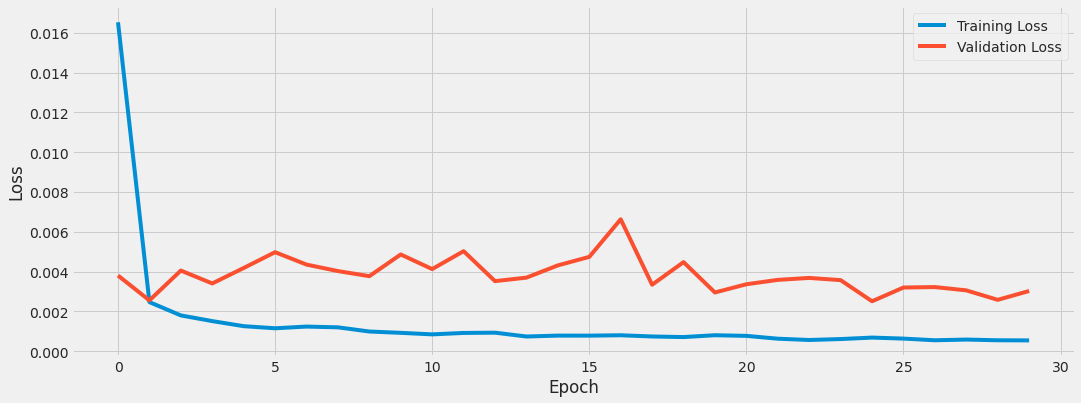

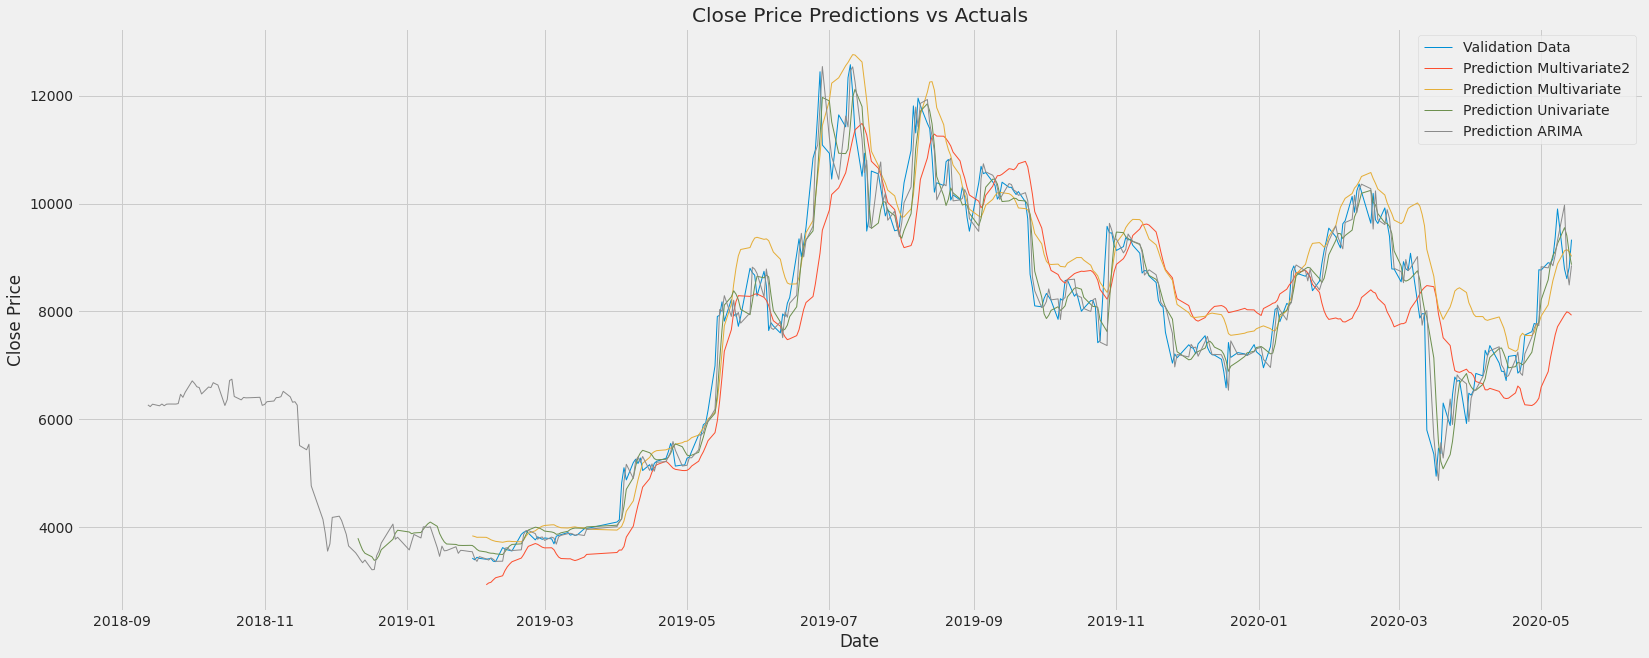

In [ ]:
# Plot the training and validation loss over time (To see if there is overfitting)
plt.figure(figsize=(16,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


plt.figure(figsize=(25,10))
# Plot the actual close values for the validation and training data
plt.plot(y_test2, label='Validation Data', linewidth=1)
plt.plot(y_pred3, label='Prediction Multivariate2', linewidth=1)
plt.plot(y_pred2, label='Prediction Multivariate', linewidth=1)
plt.plot(y_pred, label='Prediction Univariate', linewidth=1)
plt.plot(y_pred1, label='Prediction ARIMA', linewidth=1)

# Add a legend and axis labels
plt.legend()
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price Predictions vs Actuals')
plt.show()

In [ ]:
#Hand select
df.columns

Index(['BTC_Close', 'BTC_Open', 'BTC_High', 'BTC_Low', 'BTC_Volume',
       'BTC_transactions', 'BTC_interesst', 'gold_Open', 'gold_Close',
       'gold_High', 'gold_Low', 'gold_Volume', 'gold_Chg%', 'oil_Open',
       'oil_Close', 'oil_High', 'oil_Low', 'oil_Volume', 'VIX_Open',
       'VIX_Close', 'VIX_High', 'VIX_Low', 'SP500_Close index', 'weekend',
       'dayofweek', 'month', 'BTC_MACD', 'gold_MACD', 'oil_MACD', 'VIX_MACD',
       'BTC_RSI', 'gold_RSI', 'oil_RSI', 'VIX_RSI'],
      dtype='object')

In [ ]:
df2=df[['BTC_Close', 'BTC_Volume',
       'BTC_transactions', 'BTC_interesst', 
       'gold_Low',
       'oil_High', 'oil_Volume',
       'VIX_High', 'SP500_Close index', 'weekend',
       'BTC_MACD', 'gold_MACD', 
       'gold_RSI']]

In [ ]:
df2

,BTC_Close,BTC_Volume,BTC_transactions,BTC_interesst,gold_Low,oil_High,oil_Volume,VIX_High,SP500_Close index,weekend,BTC_MACD,gold_MACD,gold_RSI
Date,,,,,,,,,,,,,
2014-12-18,317.405000,2.00,98444,3,1189.7,58.730000,106315,18.51,2061.23,0,-11.834847,-5.378674,39.280360
2014-12-19,306.459990,0.00,98444,3,1196.5,56.910000,383536,17.20,2070.65,0,-14.218122,-6.088679,40.044412
2014-12-22,320.034990,0.00,86901,3,1172.7,58.529999,277319,16.88,2078.54,0,-14.840425,-7.843940,40.615616
2014-12-23,328.701000,0.00,99469,3,1175.0,57.560001,274003,15.21,2082.17,0,-14.467556,-9.129755,35.217035
2014-12-26,318.563000,0.00,76198,3,1177.2,56.590000,127202,14.84,2088.77,0,-14.819280,-8.597220,44.043321
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-08,9900.678867,25608.21,341986,19,1724.5,24.990000,205181,30.39,2929.80,0,610.372074,12.921309,50.599201
2020-05-11,8786.655182,36356.85,286789,19,1714.2,25.580000,179591,31.46,2930.19,0,578.736102,10.893334,52.341598
2020-05-12,8608.125245,19825.54,286789,19,1717.0,26.230000,212335,33.04,2870.12,0,533.113097,9.882318,41.056218


In [ ]:
df_train, df_test = train_test_split(df2, test_size=0.3, shuffle=False) #shuffle=False ensures data is split chronologically

In [ ]:
# Apply PCA
pca_scaler = StandardScaler().fit(df_train)
X_train_pca = pca_scaler.transform(df_train)
X_test_pca = pca_scaler.transform(df_test)
#select n_component to have explained_variance between 95–99%
pca = PCA(n_components=0.95) #n_components=8
X_train_pca = pca.fit_transform(X_train_pca)
X_test_pca = pca.transform(X_test_pca)

# Scale the data
X_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
X_train_scaled = X_scaler.fit_transform(X_train_pca)
X_test_scaled = X_scaler.transform(X_test_pca)
y_train_scaled = y_scaler.fit_transform(df_train[['BTC_Close']])
y_test_scaled = y_scaler.transform(df_test[['BTC_Close']])

final_train_data = pd.concat([pd.DataFrame(y_train_scaled),pd.DataFrame(X_train_scaled)],axis=1).values
final_test_data = pd.concat([pd.DataFrame(y_test_scaled),pd.DataFrame(X_test_scaled)],axis=1).values

window_size=90
X_train_lstm, y_train_lstm = split_data_m(window_size, final_train_data)
X_test_lstm, y_test_lstm = split_data_m(window_size, final_test_data)

# print(f'X_train Shape: {X_train_lstm.shape}, y_train {y_train_lstm.shape}')

# # check the array size
# print(f'X_test Shape: {X_test_lstm.shape}, y_test {y_test_lstm.shape}')

# # reshaping array
# X_train_lstm = np.reshape(X_train_lstm, (X_train_lstm.shape[0], X_train_lstm.shape[1], X_train_lstm.shape[2]))
y_train_lstm = y_train_lstm[:, np.newaxis] 
# # check the array size
# print(f'X_train Shape: {X_train_lstm.shape}, y_train {y_train_lstm.shape}')
# # reshaping array
# X_test_lstm = np.reshape(X_test_lstm, (X_test_lstm.shape[0], X_test_lstm.shape[1], X_train_lstm.shape[2]))
y_test_lstm = y_test_lstm[:, np.newaxis]
# # check the array size
# print(f'X_test Shape: {X_test_lstm.shape}, y_test {y_test_lstm.shape}')

model_lstm3 = Sequential()
model_lstm3.add(LSTM(units=64, return_sequences=True, input_shape=(window_size, X_train_lstm.shape[2])))
model_lstm3.add(LSTM(units=32, return_sequences=False))
# model_lstm.add(LSTM(units=32, return_sequences=False))
# model_lstm.add(LSTM(units=50))
model_lstm3.add(Dense(25))
model_lstm3.add(Dense(units=1))

model_lstm3.compile(optimizer='adam', loss='mean_squared_error')

#Train
history = model_lstm3.fit(X_train_lstm, y_train_lstm, batch_size=32, epochs=30, validation_data=(X_test_lstm, y_test_lstm)) # batch_size=16, epochs=100

# Get the predicted price
y_pred4 = model_lstm3.predict(X_test_lstm)

y_pred4 = pd.DataFrame(y_scaler.inverse_transform(y_pred4), index=df_test[window_size:].index) 
y_test4 = pd.DataFrame(y_scaler.inverse_transform(y_test_lstm), index=df_test[window_size:].index) 

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((y_pred4 - y_test4) ** 2)))
print(rmse)


Epoch 1/30
27/27 [==============================] - 8s 136ms/step - loss: 0.0240 - val_loss: 0.0083
Epoch 2/30
27/27 [==============================] - 3s 101ms/step - loss: 0.0040 - val_loss: 0.0041
Epoch 3/30
27/27 [==============================] - 4s 146ms/step - loss: 0.0020 - val_loss: 0.0047
Epoch 4/30
27/27 [==============================] - 3s 128ms/step - loss: 0.0019 - val_loss: 0.0049
Epoch 5/30
27/27 [==============================] - 3s 102ms/step - loss: 0.0016 - val_loss: 0.0052
Epoch 6/30
27/27 [==============================] - 3s 102ms/step - loss: 0.0013 - val_loss: 0.0063
Epoch 7/30
27/27 [==============================] - 3s 104ms/step - loss: 0.0013 - val_loss: 0.0071
Epoch 8/30
27/27 [==============================] - 5s 177ms/step - loss: 0.0011 - val_loss: 0.0062
Epoch 9/30
27/27 [==============================] - 3s 102ms/step - loss: 0.0012 - val_loss: 0.0064
Epoch 10/30
27/27 [==============================] - 3s 101ms/step - loss: 0.0011 - val_loss: 0.0074

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [ ]:
n_pcs= pca.n_components_ # get number of component
# get the index of the most important feature on each component
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = df2.columns
# get the most important feature names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
most_important_names

['BTC_Close',
 'gold_MACD',
 'BTC_MACD',
 'VIX_High',
 'oil_Volume',
 'BTC_Volume',
 'gold_Low',
 'BTC_transactions']

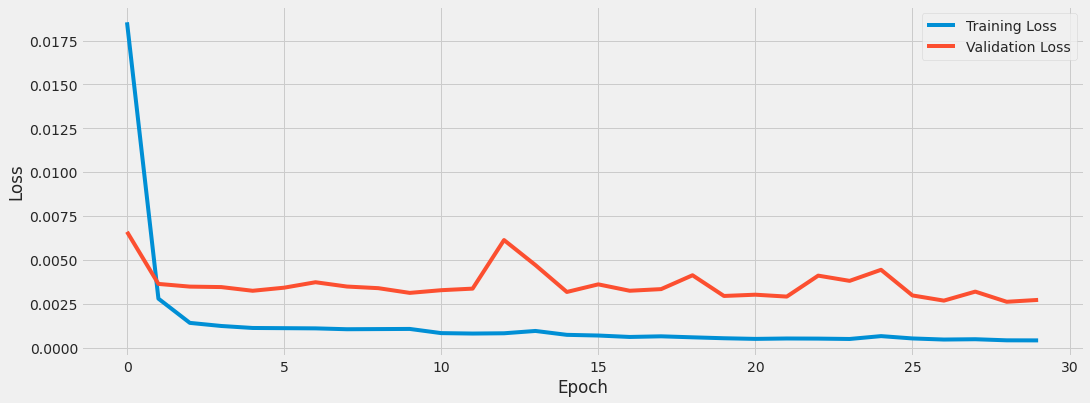

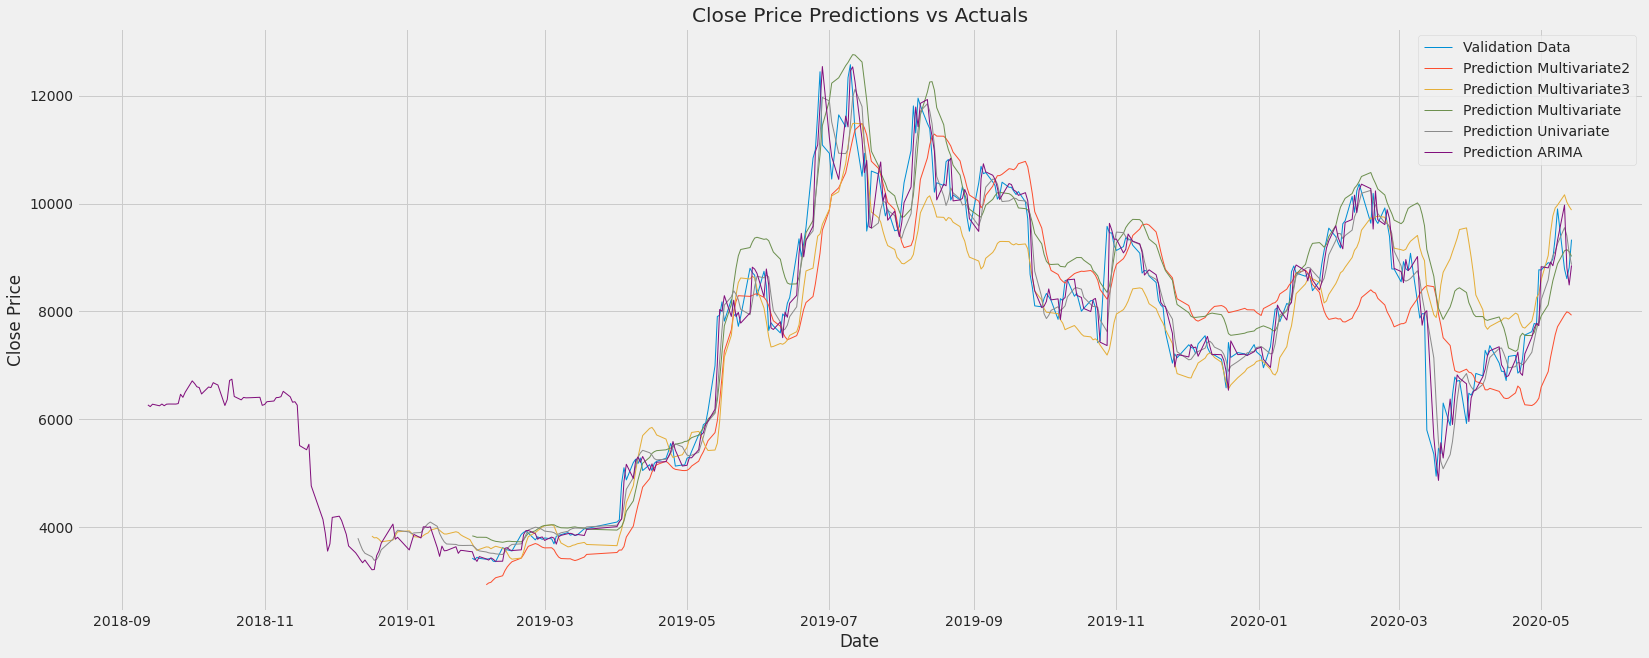

In [ ]:
# Plot the training and validation loss over time (To see if there is overfitting)
plt.figure(figsize=(16,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


plt.figure(figsize=(25,10))
# Plot the actual close values for the validation and training data
plt.plot(y_test2, label='Validation Data', linewidth=1)
plt.plot(y_pred3, label='Prediction Multivariate2', linewidth=1)
plt.plot(y_pred4, label='Prediction Multivariate3', linewidth=1)
plt.plot(y_pred2, label='Prediction Multivariate', linewidth=1)
plt.plot(y_pred, label='Prediction Univariate', linewidth=1)
plt.plot(y_pred1, label='Prediction ARIMA', linewidth=1)

# Add a legend and axis labels
plt.legend()
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price Predictions vs Actuals')
plt.show()

worse result

In [ ]:
# try functional pca